In [1]:

#Import the libaries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,0.0,0.0,0.00,0.0,0.00,2.23,0.00,0.28,5.29,16.04,2.33,0.00,0.00,0.00,0.00,0.00,0.00,7.53,16.04,2.61,46.34,124.38,1.01,18.75,80.61,0.0,0.00,0.0,0.0,0.0,0.0,0.0,65.09,204.99,1.01,0.0,0.0,0.0,8.20,0.63,0.00,0.38,0.0,0.0,81.21,221.68,3.63,2.43,3.68,7.79,0.83,21.08,16.91,0.00,0.00,0.00,3.26,24.76,24.71,0.00,7.61,0.21,7.46,19.96,14.96,0.0,0.0,0.0,0.0,0.0,0.0,7.46,27.58,15.18,11.84,53.04,40.56,0.0,0.0,0.66,0.0,0.0,0.0,1.11,0.69,0.00,3,2,2,77,65,10,65,65,10,6/22/2014,7/10/2014,8/24/2014,65,65,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.00,0.00,0.0,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,22.01,29.79,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,30.73,31.66,0.00,0.0,0.0,0.00,30.73,31.66,1.68,19.09,10.53,1.41,18.68,11.09,0.35,1.66,3.40,3.44,39.44,25.03,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,3.44,39.44,25.04,0.0,0.0,0.01,0.0,0.0,0.0,0.00,0.00,0.00,3,4,5,0,145,50,0,145,50,6/12/2014,7/10/2014,8/26/2014,0,0,0,NaN,7/8/2014,NaN,NaN,1.0,NaN,NaN,145.0,NaN,NaN,0.0,NaN,NaN,1.0,NaN,Na

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
data.shape

(69999, 172)

In [6]:
data.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.0,67312.0,66296.0,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,67231.000000,67312.000000,66296.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000

In [7]:
print(data.columns.tolist())


['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_

In [8]:
data['churn_probability'].value_counts()/len(data['churn_probability'])

0    0.898113
1    0.101887
Name: churn_probability, dtype: float64

In [9]:
rech_col = [col for col in data.columns.tolist() if 'rech' in col]
rech_col

['total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8']

In [10]:
data[['total_rech_num_6','total_rech_amt_6','av_rech_amt_data_6','total_rech_data_6','churn_probability']]

,total_rech_num_6,total_rech_amt_6,av_rech_amt_data_6,total_rech_data_6,churn_probability
0,3,77,NaN,NaN,0
1,3,0,NaN,NaN,0
2,2,70,NaN,NaN,0
3,2,160,NaN,NaN,0
4,13,290,175.0,7.0,0
...,...,...,...,...,...
69994,1,50,NaN,NaN,0
69995,5,200,NaN,NaN,0
69996,3,626,NaN,NaN,0
69997,5,379,179.0,1.0,0


There is data of 3 months June, July and August

We can calculate the high value customer by using the formula total_rech_amt_6 + (av_rech_amt_data_6*total_rech_data_6)

In [11]:
#Calculating total data recharge amount
data['total_data_rech_amt_6'] = data['av_rech_amt_data_6']*data['total_rech_data_6']
data['total_data_rech_amt_7'] = data['av_rech_amt_data_7']*data['total_rech_data_7']
data['total_data_rech_amt_8'] = data['av_rech_amt_data_8']*data['total_rech_data_8']
data.shape

(69999, 175)

In [12]:
data[['total_rech_amt_6','total_data_rech_amt_6','av_rech_amt_data_7','total_rech_data_6'] ]


,total_rech_amt_6,total_data_rech_amt_6,av_rech_amt_data_7,total_rech_data_6
0,77,NaN,NaN,NaN
1,0,NaN,145.0,NaN
2,70,NaN,NaN,NaN
3,160,NaN,NaN,NaN
4,290,1225.0,191.0,7.0
...,...,...,...,...
69994,50,NaN,135.0,NaN
69995,200,NaN,NaN,NaN
69996,626,NaN,NaN,NaN
69997,379,179.0,252.0,1.0


In [13]:
#Dropping redundant columns
data.drop(['av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7','total_rech_data_7','av_rech_amt_data_8',
           'total_rech_data_8'],
         axis=1, inplace=True)
data.shape

(69999, 169)

6 Columns have been dropped

In [14]:
data['total_amt_6'] = data['total_rech_amt_6'].fillna(0) + data['total_data_rech_amt_6'].fillna(0)
data['total_amt_7']  = data['total_rech_amt_7'].fillna(0) + data['total_data_rech_amt_7'].fillna(0)
data['total_amt_8']  = data['total_rech_amt_8'].fillna(0) + data['total_data_rech_amt_8'].fillna(0)

In [15]:
data1 = data.drop(['total_rech_amt_6','total_data_rech_amt_6','total_rech_amt_7','total_data_rech_amt_7',
          'total_rech_amt_8','total_data_rech_amt_8'],axis=1)
data1.shape

(69999, 166)

In [16]:
data1[['total_amt_6','total_amt_7','total_amt_8']]

,total_amt_6,total_amt_7,total_amt_8
0,77.0,65.0,10.0
1,0.0,290.0,50.0
2,70.0,120.0,0.0
3,160.0,240.0,130.0
4,1515.0,1473.0,974.0
...,...,...,...
69994,50.0,1342.0,529.0
69995,200.0,313.0,308.0
69996,626.0,250.0,397.0
69997,558.0,504.0,290.0


In [17]:
#Calculating average 3 months amount
total_avg_amt= (data1['total_amt_6']+data1['total_amt_7']+data1['total_amt_8'])/3
total_avg_amt.head()

0      50.666667
1     113.333333
2      63.333333
3     176.666667
4    1320.666667
dtype: float64

In [18]:
total_avg_amt_70 = np.percentile(total_avg_amt, 70.0)
print(f'70 Percentile of recharge amount is : {total_avg_amt_70}')
high_cust_data = data1[total_avg_amt>=total_avg_amt_70]
high_cust_data.head()

70 Percentile of recharge amount is : 484.3333333333333


,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_amt_8
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,10,8,50,41,30,6/25/2014,7/26/2014,8/30/2014,25,10,30,6/25/2014,7/23/2014,8/20/2014,25.0,41.0,25.0,7.0,6.0,6.0,0.0,1.0,0.0,390.80,308.89,213.47,0.0,0.00,0.00,0.00,35.00,0.00,0.00,35.12,0.00,0.0,0.0,0.0,0,0,0,7,6,6,0,0,0,0,1,0,1.0,1.0,1.0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0
15,15,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,6/27/2014,7/25/2014,8/30/2014,0,150,250,6/16/2014,NaN,8/2/2014,154.0,NaN,154.0,1.0,NaN,1.0,0.0,NaN,0.0,260.42,0.00,354.35,0.0,0.00,0.00,0.00,NaN,0.00,164.75,NaN,28.80,0

In [19]:
high_cust_data.shape

(21001, 166)

We have filtered the data with high value customers whose average total amount is greater than 70 percentile of the total average ammmount

# Data Preparation and EDA

**We can work on the data preparation and EDA and then perform PCA for dimesionality reductoion as there are lot of features , using this we will build a model to predict churn.**

**In the second step we will use the original clean dataset again and then solve the second part of the problem  which is identifying important indicators for churn for that we should use RFE/and select features to find out the best features**

In [20]:
#Finding missing value
(high_cust_data.isnull().sum() * 100 / len(high_cust_data)).sort_values(ascending = False)

arpu_2g_6                   45.216894
count_rech_2g_6             45.216894
date_of_last_rech_data_6    45.216894
arpu_3g_6                   45.216894
fb_user_6                   45.216894
night_pck_user_6            45.216894
max_rech_data_6             45.216894
count_rech_3g_6             45.216894
date_of_last_rech_data_7    42.645588
fb_user_7                   42.645588
max_rech_data_7             42.645588
arpu_2g_7                   42.645588
count_rech_2g_7             42.645588
count_rech_3g_7             42.645588
night_pck_user_7            42.645588
arpu_3g_7                   42.645588
count_rech_2g_8             41.017094
max_rech_data_8             41.017094
count_rech_3g_8             41.017094
night_pck_user_8            41.017094
date_of_last_rech_data_8    41.017094
arpu_2g_8                   41.017094
arpu_3g_8                   41.017094
fb_user_8                   41.017094
std_og_t2m_mou_8             2.571306
std_og_t2c_mou_8             2.571306
std_ic_t2f_m

In [21]:
# Drop Columns with > 40% of missing values
cols = high_cust_data.columns
df_null_perc = high_cust_data.isnull().sum() * 100 / len(high_cust_data)
df_null_df = pd.DataFrame({'col_name': cols,
                                 'perc_null': df_null_perc})

drop_cols = df_null_df.loc[(df_null_df["perc_null"] > 30.0)]["col_name"]
print("list of columns dropped:",drop_cols)

# lets drop these columns
high_cust_data1= high_cust_data.drop(drop_cols, axis=1)
high_cust_data1.shape

list of columns dropped: date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6     

(21001, 142)

In [22]:
#Finding missing value
(high_cust_data1.isnull().sum() * 100 / len(high_cust_data1)).sort_values(ascending = False)

roam_og_mou_8           2.571306
og_others_8             2.571306
spl_og_mou_8            2.571306
loc_ic_t2t_mou_8        2.571306
loc_og_t2m_mou_8        2.571306
loc_og_t2c_mou_8        2.571306
loc_ic_t2m_mou_8        2.571306
loc_og_t2t_mou_8        2.571306
loc_ic_t2f_mou_8        2.571306
std_og_t2f_mou_8        2.571306
loc_ic_mou_8            2.571306
isd_og_mou_8            2.571306
roam_ic_mou_8           2.571306
std_ic_t2t_mou_8        2.571306
loc_og_mou_8            2.571306
offnet_mou_8            2.571306
std_ic_t2m_mou_8        2.571306
onnet_mou_8             2.571306
std_ic_t2f_mou_8        2.571306
std_og_mou_8            2.571306
std_ic_t2o_mou_8        2.571306
std_og_t2t_mou_8        2.571306
std_ic_mou_8            2.571306
spl_ic_mou_8            2.571306
std_og_t2c_mou_8        2.571306
isd_ic_mou_8            2.571306
std_og_t2m_mou_8        2.571306
ic_others_8             2.571306
loc_og_t2f_mou_8        2.571306
isd_og_mou_6            2.299890
spl_og_mou

In [23]:
high_cust_data1.shape

(21001, 142)

In [24]:
#Drop rows with null values
high_cust_data2 = high_cust_data1.dropna(how='any',axis=0) 

In [25]:
high_cust_data2.shape

(19961, 142)

In [26]:
#Finding missing value
(high_cust_data2.isnull().sum() * 100 / len(high_cust_data2)).sort_values(ascending = False)

id                      0.0
spl_ic_mou_8            0.0
std_ic_mou_8            0.0
total_ic_mou_6          0.0
total_ic_mou_7          0.0
total_ic_mou_8          0.0
spl_ic_mou_6            0.0
spl_ic_mou_7            0.0
isd_ic_mou_6            0.0
std_ic_mou_6            0.0
isd_ic_mou_7            0.0
isd_ic_mou_8            0.0
ic_others_6             0.0
ic_others_7             0.0
ic_others_8             0.0
total_rech_num_6        0.0
std_ic_mou_7            0.0
std_ic_t2o_mou_8        0.0
total_rech_num_8        0.0
std_ic_t2t_mou_8        0.0
loc_ic_t2f_mou_8        0.0
loc_ic_mou_6            0.0
loc_ic_mou_7            0.0
loc_ic_mou_8            0.0
std_ic_t2t_mou_6        0.0
std_ic_t2t_mou_7        0.0
std_ic_t2m_mou_6        0.0
std_ic_t2o_mou_7        0.0
std_ic_t2m_mou_7        0.0
std_ic_t2m_mou_8        0.0
std_ic_t2f_mou_6        0.0
std_ic_t2f_mou_7        0.0
std_ic_t2f_mou_8        0.0
std_ic_t2o_mou_6        0.0
total_rech_num_7        0.0
max_rech_amt_6      

Now there are no null values

In [27]:
#Finding out object columns in dataset
object_col = list(high_cust_data2.select_dtypes(['object']).columns)
object_col

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8']

In [28]:
#Converting object into date time variable
for col in object_col:
    high_cust_data2[col] = pd.to_datetime(high_cust_data2[col])
    
high_cust_data2[object_col].head()

,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8
4,2014-06-30,2014-07-31,2014-08-31,2014-06-25,2014-07-26,2014-08-30
15,2014-06-30,2014-07-31,2014-08-31,2014-06-27,2014-07-25,2014-08-30
23,2014-06-30,2014-07-31,2014-08-31,2014-06-30,2014-07-31,2014-08-22
25,2014-06-30,2014-07-31,2014-08-31,2014-06-22,2014-07-29,2014-08-30
27,2014-06-30,2014-07-31,2014-08-31,2014-06-29,2014-07-20,2014-08-23


In [29]:
high_cust_data2.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_amt_8
4,4,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,10,8,50,41,30,2014-06-25,2014-07-26,2014-08-30,25,10,30,390.80,308.89,213.47,0.0,0.00,0.00,0,0,0,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0
15,15,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,2014-06-27,2014-07-25,2014-08-30,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0
23,23,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0

In [30]:
churn = high_cust_data2[high_cust_data2["churn_probability"]==1]
not_churn = high_cust_data2[high_cust_data2["churn_probability"]==0]

### Handling outliers

In [31]:
#Finding Numeric columns
num_col = not_churn.select_dtypes(exclude='object').columns.tolist()
remove = ['id','circle_id','churn_probability']
num_col1 = [ele for ele in num_col if ele not in remove]
num_col1

['loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'std_og_t2f_mou_8',
 'std_og_t2c_mou_6',
 'std_og_t2c_mou_7',
 'std_og_t2c_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'isd_og_mou_6',
 'isd

In [32]:
not_churn.shape

(19090, 142)

In [33]:
for cols in num_col:
    Q1 = not_churn[cols].quantile(0.05)
    Q3 = not_churn[cols].quantile(0.95)
    IQR = Q3 - Q1

    not_churn = not_churn[~((not_churn[cols] < (Q1 - 3 * IQR)) |(not_churn[cols] > (Q3 + 3* IQR)))]
not_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_amt_8
4,4,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,0.0,0.0,15.73,0.0,0.0,10.16,4.83,6.13,36.74,19.88,4.61,11.99,1.23,5.01,0.0,9.85,0.00,58.91,25.94,15.76,0.00,0.00,0.00,4.35,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,4.35,0.00,0.00,0.0,0.0,0.0,0.00,17.00,0.00,0.0,0.0,0.0,63.26,42.94,15.76,5.44,1.39,2.66,10.58,4.33,19.49,5.51,3.63,6.14,21.54,9.36,28.31,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,21.54,9.36,28.31,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,13,10,8,50,41,30,2014-06-25,2014-07-26,2014-08-30,25,10,30,390.80,308.89,213.47,0.0,0.00,0.00,0,0,0,7,6,6,0,0,0,0,1,0,647,0.0,0.00,0.00,0,1515.0,1473.0,974.0
15,15,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,580.549,377.294,338.286,10.43,24.99,194.43,317.11,341.79,197.09,0.00,0.0,0.0,0.00,0.0,0.0,10.43,24.99,194.43,313.76,330.88,185.88,3.26,10.91,4.94,0.0,0.00,0.00,327.46,366.79,385.26,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,6.26,0.0,0.0,0.0,0.00,0.00,6.26,0.0,0.0,0.0,0.08,0.00,0.00,0.1,0.0,0.0,327.64,366.79,391.53,13.86,20.18,335.43,219.31,754.24,285.63,0.00,1.93,8.88,233.18,776.36,629.94,0.0,0.00,0.00,0.00,0.00,0.00,0.00,1.03,0.0,0.0,0.0,0.0,0.00,1.03,0.00,233.18,777.39,629.94,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.00,0.0,5,3,4,250,250,250,2014-06-27,2014-07-25,2014-08-30,0,150,250,260.42,0.00,354.35,0.0,0.00,0.00,1,0,1,0,0,0,0,0,0,0,0,0,602,0.0,0.00,0.00,0,808.0,400.0,806.0
23,23,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,1130.948,905.506,479.762,859.53,372.71,0.89,293.46,450.11,386.91,0.00,0.0,0.0,0.00,0.0,0.0,859.53,372.71,0.89,79.79,424.63,378.01,11.58,25.43,8.88,0.0,0.00,0.00,950.91,822.78,387.79,0.00,0.00,0.00,202.08,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,202.08,0.00,0.00,0.0,0.0,0.0,0.00,0.05,0.01,0.0,0.0,0.0,1152.99,822.83,387.81,233.28,117.63,30.39,123.78,278.49,148.83,34.31,52.08,23.66,391.38,448.21,202.89,0.0,0.00,0.00,207.03,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0

In [34]:
not_churn.shape

(11928, 142)

In [35]:
final_churn = pd.concat([churn,not_churn],axis=0)

In [36]:
final_churn.shape

(12799, 142)

### Preparing the data  for PCA

In [37]:
#Remove datetime before scaling
high_cust_data3 = final_churn.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                       'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis = 1)
high_cust_data3.reset_index(drop=True,inplace=True)


### Scaling the data

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [39]:
#Removing IDs and id,circle ID before PCA 
high_cust_data3.drop(['id','circle_id'],axis=1,inplace= True)

In [40]:
#Preparing x and y for PCA
y=high_cust_data3.pop("churn_probability")
high_cust_data3.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8
0,0.0,0.0,0.0,339.089,240.063,113.611,10.59,0.00,7.11,281.81,171.44,71.51,0.00,0.00,0.00,0.00,0.00,0.00,8.21,0.00,7.11,62.41,12.23,41.53,0.33,0.00,0.0,3.18,6.33,0.00,70.96,12.23,48.64,2.38,0.00,0.00,197.94,134.41,29.98,0.0,0.0,0.00,0.0,0.0,0.0,200.33,134.41,29.98,0.0,0.0,0.0,37.58,34.46,2.64,1.59,0.0,0.0,310.48,181.11,81.28,4.08,10.96,4.31,79.28,21.53,19.81,3.18,0.00,0.00,86.54,32.49,24.13,2.85,0.00,0.00,13.59,3.18,6.54,0.00,0.00,0.00,0.0,0.0,0.0,16.44,3.18,6.54,102.99,35.68,30.68,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,22,15,9,44,58,30,20,30,0,654.09,349.09,197.79,0.0,0.0,0.0,0,0,0,7,6,4,0,0,0,0,0,0,207,0.0,0.0,0.0,790.0,1074.0,530.0
1,0.0,0.0,0.0,142.623,1047.395,214.704,4.10,86.56,16.19,407.63,2763.44,484.03,0.64,0.00,3.39,0.60,0.00,14.78,3.06,32.68,10.38,13.59,85.71,19.29,0.00,0.00,0.0,0.13,2.00,0.65,16.66,118.39,29.68,1.03,53.88,5.81,393.16,2671.28,443.93,0.0,0.0,0.00,0.0,0.0,0.0,394.19,2725.16,449.74,0.0,0.0,0.0,0.26,6.44,6.01,0.00,0.0,0.0,411.13,2850.01,485.44,9.79,29.88,3.61,33.83,188.34,35.19,0.00,0.00,0.00,43.63,218.23,38.81,0.00,2.89,1.56,36.78,12.86,1.93,0.00,0.00,0.00,0.0,0.0,0.0,36.78,15.76,3.50,80.41,234.06,42.31,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.06,0.0,7,16,5,110,128,128,110,128,0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,868,0.0,0.0,0.0,269.0,1284.0,128.0
2,0.0,0.0,0.0,0.000,1032.405,1644.883,0.00,2744.54,3944.86,1.88,605.09,660.63,1.99,4.21,2.11,1.88,8.16,15.98,0.00,186.56,443.81,0.00,157.24,263.21,0.00,0.36,0.0,0.00,0.00,5.81,0.00,344.18,707.03,0.00,2552.51,3485.06,0.00,443.66,383.08,0.0,0.0,5.01,0.0,0.0,0.0,0.00,2996.18,3873.16,0.0,0.0,0.0,0.00,14.36,13.21,0.00,0.0,0.0,0.00,3354.73,4593.41,0.00,159.06,324.36,0.00,152.68,312.61,0.00,0.00,6.01,0.00,311.74,642.99,0.00,10.74,12.99,0.00,24.16,37.19,0.00,0.00,5.41,0.0,0.0,0.0,0.00,34.91,55.61,0.00,349.34,698.98,0.0,0.0,0.0,0.0,2.68,0.36,0.0,0.00,0.0,5,17,30,0,128,169,0,128,45,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1515,0.0,0.0,0.0,0.0,1428.0,1962.0
3,0.0,0.0,0.0,963.469,1043.569,449.696,215.46,187.03,36.08,2382.08,2650.24,1091.06,0.00,0.00,1.71,0.00,0.00,1.68,0.43,0.00,

In [41]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: churn_probability, dtype: int64

In [42]:
high_cust_data3.describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8
count,12799.0,12799.0,12799.0,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.0,12799.0,12799.0,12799.000000,12799.000000,12799.00000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.0,12799.0,12799.0,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000,12799.000000
mean,0.0,0.0,0.0,478.986185,493.029972,479.469824,234.712971,249.622183,233.603088,326.649024,343.725251,320.832315,7.826770,5.166555,5.066975,14.531727,9.214034,8.989240,62.323902,62.480377,59.763478,142.317054,145.421342,141.750209,3.963558,4.044131,3.914314,1.176812,1.400013,1.460107,208.612426,211.953984,205.435967,166.479272,183.342891,170.016965,167.419834,184.531635,165.668515,0.403185,0.

In [43]:
X = high_cust_data3.copy()

In [44]:
train_cols = high_cust_data3.columns.tolist()

In [45]:
x= scaler.fit_transform(X)

In [46]:
x[:5,:5]

array([[ 0.        ,  0.        ,  0.        , -0.43653804, -0.80223158],
       [ 0.        ,  0.        ,  0.        , -1.04959457,  1.75805217],
       [ 0.        ,  0.        ,  0.        , -1.49463831,  1.71051454],
       [ 0.        ,  0.        ,  0.        ,  1.5117901 ,  1.74591882],
       [ 0.        ,  0.        ,  0.        , -0.4374024 , -0.25000854]])

### Applying PCA on the data

In [47]:
from sklearn.decomposition import PCA

In [48]:
pca = PCA(random_state = 42)

In [49]:
pca.fit(x)

PCA(random_state=42)

In [50]:
pca.components_

array([[-6.57165345e-19,  5.55111512e-16, -1.11022302e-16, ...,
         2.79440085e-03, -4.41758855e-03, -6.17016565e-03],
       [ 5.94614689e-20,  6.93889390e-18,  2.01227923e-16, ...,
        -2.35052202e-02, -1.65165068e-02, -2.86029577e-02],
       [-1.08898839e-18,  0.00000000e+00,  2.11636264e-16, ...,
         5.33640198e-02,  4.23992263e-02,  3.68879228e-02],
       ...,
       [-0.00000000e+00,  9.42948345e-03,  5.66665958e-02, ...,
         5.37764278e-17, -5.68121938e-17,  4.42354486e-17],
       [-0.00000000e+00,  1.65934764e-01,  1.63567721e-01, ...,
        -6.93889390e-17,  3.29597460e-17,  1.04083409e-17],
       [ 9.99998434e-01, -1.71898338e-03,  1.20487194e-04, ...,
         1.57073790e-17,  1.26462019e-18,  7.18283939e-19]])

In [51]:
pca.explained_variance_ratio_

array([1.16980234e-01, 1.00826402e-01, 5.25895621e-02, 3.98437184e-02,
       3.58712289e-02, 3.53478797e-02, 2.86462745e-02, 2.49961579e-02,
       2.41879391e-02, 2.30554107e-02, 2.21236995e-02, 2.13146011e-02,
       2.08536516e-02, 1.82660845e-02, 1.67150788e-02, 1.60248187e-02,
       1.43685742e-02, 1.39395208e-02, 1.30830315e-02, 1.20418440e-02,
       1.18466328e-02, 1.16136673e-02, 1.09629740e-02, 1.06202797e-02,
       1.04039432e-02, 9.99103850e-03, 9.28252820e-03, 8.82453449e-03,
       8.56332642e-03, 8.41489897e-03, 8.07548482e-03, 7.90082552e-03,
       7.57981377e-03, 7.39934127e-03, 7.34123953e-03, 7.16764431e-03,
       7.08578458e-03, 6.86617642e-03, 6.67614000e-03, 6.53652345e-03,
       6.52495850e-03, 6.37409943e-03, 6.18525853e-03, 5.97573079e-03,
       5.89571394e-03, 5.76205870e-03, 5.48594378e-03, 5.37993873e-03,
       5.37276910e-03, 5.19487432e-03, 4.82579155e-03, 4.78532785e-03,
       4.66781224e-03, 4.44046922e-03, 4.25995425e-03, 4.13280914e-03,
      

In [52]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

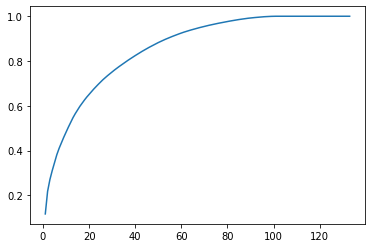

In [53]:
plt.plot(range(1,len(var_cumu)+1),var_cumu)

Around 80 features explains more than 90% variance

In [54]:
pc2 = PCA(n_components = 80,random_state=42)
new_data = pc2.fit_transform(x)

In [55]:
new_data.shape

(12799, 80)

In [56]:
y.shape

(12799,)

In [57]:
#Making a dataframe
new_churn = pd.DataFrame(new_data)
new_churn

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79
0,-4.180531,0.326027,-3.114348,0.773630,-0.169604,1.513494,1.287454,1.243264,-0.549370,0.802878,1.659771,0.153490,1.030097,-0.084300,1.260450,0.213121,-1.284938,0.223235,-0.553531,-0.682084,-0.241512,-0.437826,0.209064,-0.172714,-0.538302,0.394924,0.099101,1.260468,-0.740764,0.716746,-0.077433,0.115361,0.286149,-0.196299,-0.882476,-0.855148,-0.322241,-0.936479,0.485834,0.067323,0.195201,0.332147,0.242603,-0.276106,0.033615,-0.481086,-0.055826,-0.274898,0.672902,-0.222156,-0.496410,-1.064954,0.950502,-0.011856,-0.392258,-0.094720,-0.006669,0.173569,-0.257805,0.123615,-0.177922,-0.227099,-0.433033,0.114736,-0.363567,-0.105835,0.014808,-0.076974,0.110236,1.156834,-0.598608,0.232162,0.295681,-0.037368,-0.040682,0.043988,0.064657,0.060524,-0.008286,-0.028880
1,-0.152094,4.809213,0.216501,0.729591,-4.977101,-0.040887,-1.309603,0.663550,0.115542,0.758023,-1.746559,-0.523528,-0.184770,-1.296000,0.293312,0.376772,1.031960,1.495809,0.212203,-3.820177,-1.099208,-1.086332,0.491953,1.533361,0.591482,0.061133,-0.312506,-0.535377,0.368504,0.128077,0.435697,0.721940,0.033922,0.265455,0.254139,-0.425459,1.663192,-0.462183,-0.119423,-0.645908,-0.007459,0.350065,1.386954,0.405188,-1.630961,1.208705,0.406626,-1.117500,-0.378782,-0.613125,0.269059,0.477957,0.564198,0.017958,-0.253522,-0.441826,-0.552895,-1.372537,-1.622970,-0.670562,0.727224,0.472684,-0.492828,-0.693904,0.170233,0.482944,0.421325,0.001539,-0.710739,-0.235821,-0.015819,-0.505926,-0.385081,1.508170,-2.089609,-0.084652,0.378538,0.250908,-1.980647,-0.974998
2,6.142904,10.272751,0.943844,-5.445314,6.430851,-0.763519,-2.571151,-9.463379,5.182000,0.004197,-0.623126,-0.761898,0.249088,-1.175126,-1.482242,1.257641,0.761541,-0.380405,-0.045371,-2.700354,-0.653906,-0.906003,0.482327,-1.717837,-1.119979,-1.023452,-1.305601,1.779121,1.118323,-0.705725,0.689779,1.473240,-0.282713,-1.061300,-1.262742,-0.333072,-0.705211,-1.161810,-0.122987,-0.841956,-1.365863,-0.603046,0.414095,0.734333,-3.219292,0.307940,-4.451051,-1.008133,2.931050,0.608571,0.288691,0.605293,-0.833685,0.133475,-0.686452,0.505798,-0.181390,1.790053,-1.155861,-1.082375,-0.460976,0.519727,-0.291248,-0.835726,0.266500,-0.304937,0.205989,-1.107615,0.598475,1.288151,0.377625,0.117049,-0.074743,-0.280136,0.017102,0.777231,-0.206233,-0.377614,-0.001679,-0.613213
3,2.384877,9.461525,1.621430,2.472096,-6.956421,2.065204,-1.223588,3.665807,-1.457482,2.822295,-0.553550,-0.607156,-1.466251,-3.303550,-0.506662,1.877820,0.590372,1.856263,-0.640741,-1.281604,0.951794,0.483962,0.941872,1.021765,0.900292,0.189774,-2.332963,-1.144151,-0.245144,2.235760,1.031714,-0.788791,0.136125,0.601052,-0.137004,-0.341699,0.750692,0.061738,0.351659,1.226955,0.648538,0.672899,-0.365776,0.150155,-2.446800,-0.838003,-1.049670,0.343956,0.884199,-3.944303,2.130699,0.741195,1.309908,1.206614,0.423515,0.178112,0.036611,0.871288,0.052053,-0.232352,0.873690,-0.363988,-0.346718,-0.184645,-0.102940,-0.255120,0.208537,-0.114745,-0.785042,-0.366880,0.035418,0.123157,0.204984,0.353245,-0.354126,-0.056758,0.086376,0.216487,-0.590851,-0.523289
4,-2.442689,3.044296,-0.638752,-0.932317,0.899718,-0.662059,-0.077123,0.507327,0.016966,0.901080,0.621798,0.707260,1.773366,0.250594,0.989328,0.278200,-0.329114,-0.012730,-0.678667,-0.884642,-0.336402,0.049790,0.615765,-0.163194,-0.147249,-0.033204,-0.592574,1.453410,-1.505665,-0.026652,-0.104827,0.896482,0.522036,0.000315,0.042775,0.022460,-0.550439,0.161497,-0.140930,-0.704280,0.214433,-0.196778,0.574752,0.151391,0.323024,0.173819,0.128413,-0.345996,0.044216,-0.060500,0.203829,0.279860,-0.101419,0.061185,-0.517371,0.318240,0.380451,0.172625,-0.398986,0.087560,0.162843,-0.129028,-0.356263,-0.103461,0.110369,0.213914,0.157023,0.018855,-0.071967,-0.468392,0.065156,-0.340652,0.252726,0.061300,-0.287081,-0.09803

<AxesSubplot:>

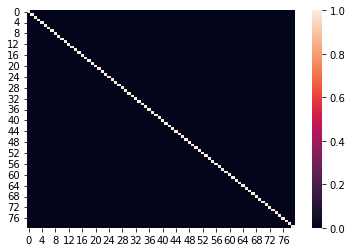

In [58]:
sns.heatmap(new_churn.corr())

No Correlation between features

In [59]:
y.reset_index(drop=True,inplace=True)
y

0        1
1        1
2        1
3        1
4        1
        ..
12794    0
12795    0
12796    0
12797    0
12798    0
Name: churn_probability, Length: 12799, dtype: int64

In [60]:
X = new_churn
y_train = y

### Model Building

In [61]:
X_tr, X_te, y_tr, y_test = train_test_split(X, y_train, test_size=0.3, random_state=1)

In [62]:
log_clf    = LogisticRegression(class_weight='balanced')
dt_clf     = DecisionTreeClassifier(class_weight='balanced')
rf_clf     = RandomForestClassifier(n_estimators=500, class_weight='balanced', n_jobs=-1)

In [63]:
# Classify function will run classification algorithms as given in the "clf_list" and return a dtaframe with accuracy score 
# of test and train data set in each algorithm
# It will do the .fit, > predict and append scores to a pre defiend list (test_Scores, train_scores)
# Then it returns a data frame, datafram has bee declared global

def classify(clf_list,X_train,y_train,X_test,y_test):
    for clf in clf_list:
        clf.fit(X_train, y_train)
        clf.predict(X_train)
        clf.predict(X_test)
    
        clf.score(X_train, y_train)
        clf.score(X_test, y_test)
        
        train_scores.append(np.round(clf.score(X_train, y_train), decimals=2))
        test_scores.append(np.round(clf.score(X_test, y_test), decimals=2))
        clf_names.append(clf.__class__.__name__)
        
        # Decalred the accuracy_frame as global variable so as to enable further use of the data frame beyond the function
        global accuracy_frame 
        
        accuracy_frame = pd.DataFrame(data={'Train Accuracy': train_scores, 'Test Accuracy': test_scores},index=clf_names)

    return accuracy_frame

In [64]:
%%time
train_scores = []
test_scores  = []
clf_names    = []

#clf_list = [log_clf, sv_clf, dt_clf,rf_clf]
clf_list=[log_clf,dt_clf,rf_clf]
classify(clf_list,X_tr,y_tr,X_te,y_test)

CPU times: total: 1min 15s
Wall time: 13.9 s


,Train Accuracy,Test Accuracy
LogisticRegression,0.87,0.87
DecisionTreeClassifier,1.00,0.92
RandomForestClassifier,1.00,0.93


RandomForest Classifier is the best model, we can use that to predict churn probability on test data

In [65]:
#Importing test data

test= pd.read_csv("test.csv")

In [66]:
test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g
0,69999,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,103,90,60,50,30,30,6/21/2014,7/26/2014,8/24/2014,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00
1,70000,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,500,500,500,250,250,250,6/19/2014,7/16/2014,8/24/2014,250,0,0,NaN,NaN,Na

In [67]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Columns: 171 entries, id to jun_vbc_3g
dtypes: float64(135), int64(27), object(9)
memory usage: 39.1+ MB


In [68]:
#Preparing the test data before applying prediction
#Calculating total data recharge amount
test['total_data_rech_amt_6'] = test['av_rech_amt_data_6']*test['total_rech_data_6']
test['total_data_rech_amt_7'] = test['av_rech_amt_data_7']*test['total_rech_data_7']
test['total_data_rech_amt_8'] = test['av_rech_amt_data_8']*test['total_rech_data_8']


In [69]:
#Dropping redundant columns
test.drop(['av_rech_amt_data_6','total_rech_data_6','av_rech_amt_data_7','total_rech_data_7','av_rech_amt_data_8',
           'total_rech_data_8'],
         axis=1, inplace=True)
test.shape

(30000, 168)

In [70]:

test['total_amt_6'] = test['total_rech_amt_6'].fillna(0) + test['total_data_rech_amt_6'].fillna(0)
test['total_amt_7']  = test['total_rech_amt_7'].fillna(0) + test['total_data_rech_amt_7'].fillna(0)
test['total_amt_8']  = test['total_rech_amt_8'].fillna(0) + test['total_data_rech_amt_8'].fillna(0)

In [71]:
test1 = test.drop(['total_rech_amt_6','total_data_rech_amt_6','total_rech_amt_7','total_data_rech_amt_7',
          'total_rech_amt_8','total_data_rech_amt_8'],axis=1)
test1.shape

(30000, 165)

In [72]:
#Remove datetime before scaling
test2 = test1.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                       'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis = 1)

In [73]:
test2.shape


(30000, 159)

In [74]:
test2.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8
0,69999,109,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,50,30,30,30,30,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,1692,0.00,0.00,0.00,103.0,90.0,60.0
1,70000,109,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,250,250,250,250,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,2533,0.00,0.00,0.00,500.0,500.0,500.0
2,70001,109,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0

In [75]:
#Bring the test data as train cols
train_cols.append('id')
test3 = test2[train_cols]
test3.shape

(30000, 134)

In [76]:
test3.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8,id
0,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,103.0,90.0,60.0,69999
1,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,500.0,500.0,70000
2,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,500.0,1000.0,1000.0,70001
3,0.0,0.0,0.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.0

In [77]:
#Drop rows with null values
#Finding missing value
(test3.isnull().sum() * 100 / len(test3)).sort_values(ascending = False)

std_ic_mou_8          5.583333
isd_og_mou_8          5.583333
loc_og_t2c_mou_8      5.583333
spl_ic_mou_8          5.583333
spl_og_mou_8          5.583333
loc_og_t2f_mou_8      5.583333
loc_ic_t2t_mou_8      5.583333
std_og_t2t_mou_8      5.583333
loc_og_t2m_mou_8      5.583333
loc_ic_t2m_mou_8      5.583333
std_og_t2c_mou_8      5.583333
loc_og_t2t_mou_8      5.583333
loc_ic_t2f_mou_8      5.583333
roam_og_mou_8         5.583333
loc_og_mou_8          5.583333
loc_ic_mou_8          5.583333
roam_ic_mou_8         5.583333
std_ic_t2t_mou_8      5.583333
std_og_t2m_mou_8      5.583333
offnet_mou_8          5.583333
std_ic_t2m_mou_8      5.583333
onnet_mou_8           5.583333
std_ic_t2f_mou_8      5.583333
std_og_mou_8          5.583333
isd_ic_mou_8          5.583333
std_ic_t2o_mou_8      5.583333
std_og_t2f_mou_8      5.583333
ic_others_8           5.583333
og_others_8           5.583333
spl_og_mou_7          3.906667
isd_og_mou_7          3.906667
og_others_7           3.906667
spl_ic_m

In [78]:
test4 = test3.dropna(how='any',axis=0) 

In [79]:
test4.reset_index(drop=True,inplace=True)

In [80]:
#Removing ID for PCA
test5 = test4.drop("id",axis=1)
test5.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8
0,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,103.0,90.0,60.0
1,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,500.0,500.0
2,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,500.0,1000.0,1000.0
3,0.0,0.0,0.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.26,98.61,22.86,0.00,2.16,0.00,37.09,94.

In [81]:


test5.shape

(27343, 133)

In [82]:
#Scaling data before PCA
x_test= scaler.transform(test5)


In [83]:
new_test_data = pc2.transform(x_test)
new_test_data.shape

(27343, 80)

In [84]:
predict = rf_clf.predict(new_test_data)

In [85]:
predict= pd.DataFrame(predict,columns = ["churn_prob"])

In [86]:
final = pd.concat([test4,predict],axis=1)

In [87]:
final.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,total_amt_6,total_amt_7,total_amt_8,id,churn_prob
0,0.0,0.0,0.0,91.882,65.330,64.445,31.78,20.23,23.11,60.16,32.16,34.83,0.00,0.00,0.00,0.00,0.00,0.00,24.88,20.23,21.06,18.13,10.89,8.36,0.00,13.58,0.00,0.0,0.00,0.03,43.01,44.71,29.43,6.90,0.00,2.05,42.03,7.68,26.43,0.0,0.0,0.0,0.0,0.0,0.0,48.93,7.68,28.48,0.0,0.0,0.0,0.00,0.00,0.03,0.0,0.0,0.0,91.94,52.39,57.94,30.33,37.56,21.98,10.21,4.59,9.53,0.26,0.00,0.00,40.81,42.16,31.51,0.00,0.00,0.00,0.36,1.04,4.34,0.0,0.0,0.00,0.0,0.0,0.0,0.36,1.04,4.34,41.73,43.56,36.26,0.54,0.34,0.39,0.00,0.00,0.00,0.0,0.0,0.00,5,5,4,50,30,30,30,30,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,1692,0.00,0.00,0.00,103.0,90.0,60.0,69999,0
1,0.0,0.0,0.0,414.168,515.568,360.868,75.51,41.21,19.84,474.34,621.84,394.94,0.00,0.00,0.00,0.00,0.00,0.00,75.51,41.21,19.84,473.61,598.08,377.26,0.73,0.00,0.00,0.0,0.00,0.00,549.86,639.29,397.11,0.00,0.00,0.00,0.00,23.76,17.68,0.0,0.0,0.0,0.0,0.0,0.0,0.00,23.76,17.68,0.0,0.0,0.8,0.00,0.00,0.00,0.0,0.0,0.0,549.86,663.06,415.59,19.99,26.95,2.61,160.19,122.29,184.81,1.49,0.00,0.00,181.69,149.24,187.43,0.00,0.00,0.00,0.00,12.51,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,12.51,0.00,296.33,339.64,281.66,0.00,0.00,0.00,114.63,177.88,94.23,0.0,0.0,0.00,5,4,5,250,250,250,250,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,2533,0.00,0.00,0.00,500.0,500.0,500.0,70000,1
2,0.0,0.0,0.0,329.844,434.884,746.239,7.54,7.86,8.40,16.98,45.81,45.04,22.81,103.38,26.08,24.53,53.68,54.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,6,9,5,300,500,500,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,277,525.61,758.41,241.84,500.0,1000.0,1000.0,70001,0
3,0.0,0.0,0.0,43.550,171.390,24.400,5.31,2.16,0.00,40.04,205.01,24.01,0.00,0.00,0.00,0.00,0.00,0.00,5.31,0.00,0.00,2.94,98.61,20.51,0.00,0.00,2.35,0.0,6.18,0.00,8.2

In [88]:
final_pred = final[["id","churn_prob"]]

In [89]:
final_pred

,id,churn_prob
0,69999,0
1,70000,1
2,70001,0
3,70002,0
4,70003,0
...,...,...
27338,99994,0
27339,99995,0
27340,99996,0
27341,99997,0


In [90]:
final_pred.to_csv('solution.csv',index=False)

Now finding out the important features which is causing churn

In this problem we will be dropping the columns by using RFE aand using multiple models on train dataset

In [91]:
#Using dataframe high_cust_data3 which prior to scaling in PCA
final_churn.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_amt_8
139,139,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,339.089,240.063,113.611,10.59,0.00,7.11,281.81,171.44,71.51,0.00,0.00,0.00,0.00,0.00,0.00,8.21,0.00,7.11,62.41,12.23,41.53,0.33,0.00,0.0,3.18,6.33,0.00,70.96,12.23,48.64,2.38,0.00,0.00,197.94,134.41,29.98,0.0,0.0,0.00,0.0,0.0,0.0,200.33,134.41,29.98,0.0,0.0,0.0,37.58,34.46,2.64,1.59,0.0,0.0,310.48,181.11,81.28,4.08,10.96,4.31,79.28,21.53,19.81,3.18,0.00,0.00,86.54,32.49,24.13,2.85,0.00,0.00,13.59,3.18,6.54,0.00,0.00,0.00,0.0,0.0,0.0,16.44,3.18,6.54,102.99,35.68,30.68,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,22,15,9,44,58,30,2014-06-29,2014-07-22,2014-08-24,20,30,0,654.09,349.09,197.79,0.0,0.0,0.0,0,0,0,7,6,4,0,0,0,0,0,0,207,0.0,0.0,0.0,1,790.0,1074.0,530.0
370,370,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,142.623,1047.395,214.704,4.10,86.56,16.19,407.63,2763.44,484.03,0.64,0.00,3.39,0.60,0.00,14.78,3.06,32.68,10.38,13.59,85.71,19.29,0.00,0.00,0.0,0.13,2.00,0.65,16.66,118.39,29.68,1.03,53.88,5.81,393.16,2671.28,443.93,0.0,0.0,0.00,0.0,0.0,0.0,394.19,2725.16,449.74,0.0,0.0,0.0,0.26,6.44,6.01,0.00,0.0,0.0,411.13,2850.01,485.44,9.79,29.88,3.61,33.83,188.34,35.19,0.00,0.00,0.00,43.63,218.23,38.81,0.00,2.89,1.56,36.78,12.86,1.93,0.00,0.00,0.00,0.0,0.0,0.0,36.78,15.76,3.50,80.41,234.06,42.31,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.06,0.0,7,16,5,110,128,128,2014-06-29,2014-07-31,2014-08-26,110,128,0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,868,0.0,0.0,0.0,1,269.0,1284.0,128.0
464,464,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,1032.405,1644.883,0.00,2744.54,3944.86,1.88,605.09,660.63,1.99,4.21,2.11,1.88,8.16,15.98,0.00,186.56,443.81,0.00,157.24,263.21,0.00,0.36,0.0,0.00,0.00,5.81,0.00,344.18,707.03,0.00,2552.51,3485.06,0.00,443.66,383.08,0.0,0.0,5.01,0.0,0.0,0.0,0.00,2996.18,3873.16,0.0,0.0,0.0,0.00,14.36,13.21,0.00,0.0,0.0,0.00,3354.73,4593.41,0.00,159.06,324.36,0.00,152.68,312.61,0.00,0.00,6.01,0.00,311.74,642.99,0.00,10.74,12.99,0.

In [92]:
clean_data = final_churn.reset_index(drop=True)
clean_data.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,total_amt_6,total_amt_7,total_amt_8
0,139,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,339.089,240.063,113.611,10.59,0.00,7.11,281.81,171.44,71.51,0.00,0.00,0.00,0.00,0.00,0.00,8.21,0.00,7.11,62.41,12.23,41.53,0.33,0.00,0.0,3.18,6.33,0.00,70.96,12.23,48.64,2.38,0.00,0.00,197.94,134.41,29.98,0.0,0.0,0.00,0.0,0.0,0.0,200.33,134.41,29.98,0.0,0.0,0.0,37.58,34.46,2.64,1.59,0.0,0.0,310.48,181.11,81.28,4.08,10.96,4.31,79.28,21.53,19.81,3.18,0.00,0.00,86.54,32.49,24.13,2.85,0.00,0.00,13.59,3.18,6.54,0.00,0.00,0.00,0.0,0.0,0.0,16.44,3.18,6.54,102.99,35.68,30.68,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,22,15,9,44,58,30,2014-06-29,2014-07-22,2014-08-24,20,30,0,654.09,349.09,197.79,0.0,0.0,0.0,0,0,0,7,6,4,0,0,0,0,0,0,207,0.0,0.0,0.0,1,790.0,1074.0,530.0
1,370,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,142.623,1047.395,214.704,4.10,86.56,16.19,407.63,2763.44,484.03,0.64,0.00,3.39,0.60,0.00,14.78,3.06,32.68,10.38,13.59,85.71,19.29,0.00,0.00,0.0,0.13,2.00,0.65,16.66,118.39,29.68,1.03,53.88,5.81,393.16,2671.28,443.93,0.0,0.0,0.00,0.0,0.0,0.0,394.19,2725.16,449.74,0.0,0.0,0.0,0.26,6.44,6.01,0.00,0.0,0.0,411.13,2850.01,485.44,9.79,29.88,3.61,33.83,188.34,35.19,0.00,0.00,0.00,43.63,218.23,38.81,0.00,2.89,1.56,36.78,12.86,1.93,0.00,0.00,0.00,0.0,0.0,0.0,36.78,15.76,3.50,80.41,234.06,42.31,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.06,0.0,7,16,5,110,128,128,2014-06-29,2014-07-31,2014-08-26,110,128,0,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,868,0.0,0.0,0.0,1,269.0,1284.0,128.0
2,464,109,0.0,0.0,0.0,2014-06-30,2014-07-31,2014-08-31,0.000,1032.405,1644.883,0.00,2744.54,3944.86,1.88,605.09,660.63,1.99,4.21,2.11,1.88,8.16,15.98,0.00,186.56,443.81,0.00,157.24,263.21,0.00,0.36,0.0,0.00,0.00,5.81,0.00,344.18,707.03,0.00,2552.51,3485.06,0.00,443.66,383.08,0.0,0.0,5.01,0.0,0.0,0.0,0.00,2996.18,3873.16,0.0,0.0,0.0,0.00,14.36,13.21,0.00,0.0,0.0,0.00,3354.73,4593.41,0.00,159.06,324.36,0.00,152.68,312.61,0.00,0.00,6.01,0.00,311.74,642.99,0.00,10.74,12.99,0.00,24.

In [93]:
# lets drop the highly correlated ones
cor = clean_data.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values(ascending= False)

total_ic_mou_8      loc_ic_mou_8        0.975587
total_ic_mou_6      loc_ic_mou_6        0.963643
total_ic_mou_7      loc_ic_mou_7        0.959250
std_og_t2t_mou_7    onnet_mou_7         0.957437
std_og_t2t_mou_8    onnet_mou_8         0.957384
std_og_t2t_mou_6    onnet_mou_6         0.946932
loc_ic_mou_8        loc_ic_t2m_mou_8    0.936086
loc_ic_mou_7        loc_ic_t2m_mou_7    0.932403
loc_ic_mou_6        loc_ic_t2m_mou_6    0.929665
std_ic_mou_8        std_ic_t2m_mou_8    0.924178
loc_og_mou_8        loc_og_t2m_mou_8    0.920600
total_ic_mou_8      loc_ic_t2m_mou_8    0.912643
loc_og_mou_7        loc_og_t2m_mou_7    0.911786
total_og_mou_7      std_og_mou_7        0.902284
loc_og_mou_6        loc_og_t2m_mou_6    0.900887
total_og_mou_8      std_og_mou_8        0.899727
total_ic_mou_6      loc_ic_t2m_mou_6    0.895656
total_ic_mou_7      loc_ic_t2m_mou_7    0.893645
total_og_mou_6      std_og_mou_6        0.891874
std_og_t2m_mou_7    offnet_mou_7        0.873264
std_og_t2m_mou_8    

In [94]:
type(cor[(cor > 0.60) | (cor < -0.60)])

pandas.core.series.Series

In [95]:
corr_del= cor[(cor > 0.60) | (cor < -0.60)].to_frame(name = "corr")

In [124]:
#Dropping high correlated features
drop_lst = ["arpu_7","onnet_mou_7","onnet_mou_8","offnet_mou_6","offnet_mou_7",
            "offnet_mou_8","roam_ic_mou_7","roam_ic_mou_8","roam_og_mou_6","roam_og_mou_7",
            "roam_og_mou_8","loc_og_t2t_mou_7","loc_og_t2t_mou_8","loc_og_t2m_mou_7",
            "loc_og_t2m_mou_8","loc_og_t2f_mou_7","loc_og_t2f_mou_8","loc_og_mou_6",
            "loc_og_mou_7","loc_og_mou_8","std_og_t2t_mou_6","std_og_t2t_mou_7",
            "std_og_t2t_mou_8","std_og_t2m_mou_6","std_og_t2m_mou_7","std_og_t2m_mou_8",
            "std_og_t2f_mou_8","std_og_mou_6","std_og_mou_7","std_og_mou_8","isd_og_mou_7",
            "isd_og_mou_8","spl_og_mou_7","total_og_mou_6","total_og_mou_7","total_og_mou_8",
            "loc_ic_t2t_mou_7","loc_ic_t2t_mou_8","loc_ic_t2m_mou_7","loc_ic_t2m_mou_8",
            "loc_ic_t2f_mou_7","loc_ic_t2f_mou_8","loc_ic_mou_6","loc_ic_mou_7","loc_ic_mou_8",
            "std_ic_t2t_mou_7","std_ic_t2m_mou_7","std_ic_t2m_mou_8","std_ic_mou_6","std_ic_mou_7",
            "std_ic_mou_8","total_ic_mou_6","total_ic_mou_7","total_ic_mou_8","isd_ic_mou_7",
            "total_rech_num_7","max_rech_amt_7","max_rech_amt_8",
            "last_day_rch_amt_6","last_day_rch_amt_8","vol_2g_mb_7","vol_2g_mb_8",
            "vol_3g_mb_7","vol_3g_mb_8","sachet_2g_7","sachet_2g_8","monthly_3g_6",
            "monthly_3g_7","monthly_3g_8","aug_vbc_3g","jul_vbc_3g","jun_vbc_3g"]
clean_data1 = clean_data.drop(drop_lst,axis=1)

In [125]:
clean_data1.shape

(12799, 70)

In [126]:
# function to plot scatter plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [127]:
# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "Telecom Churn"
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

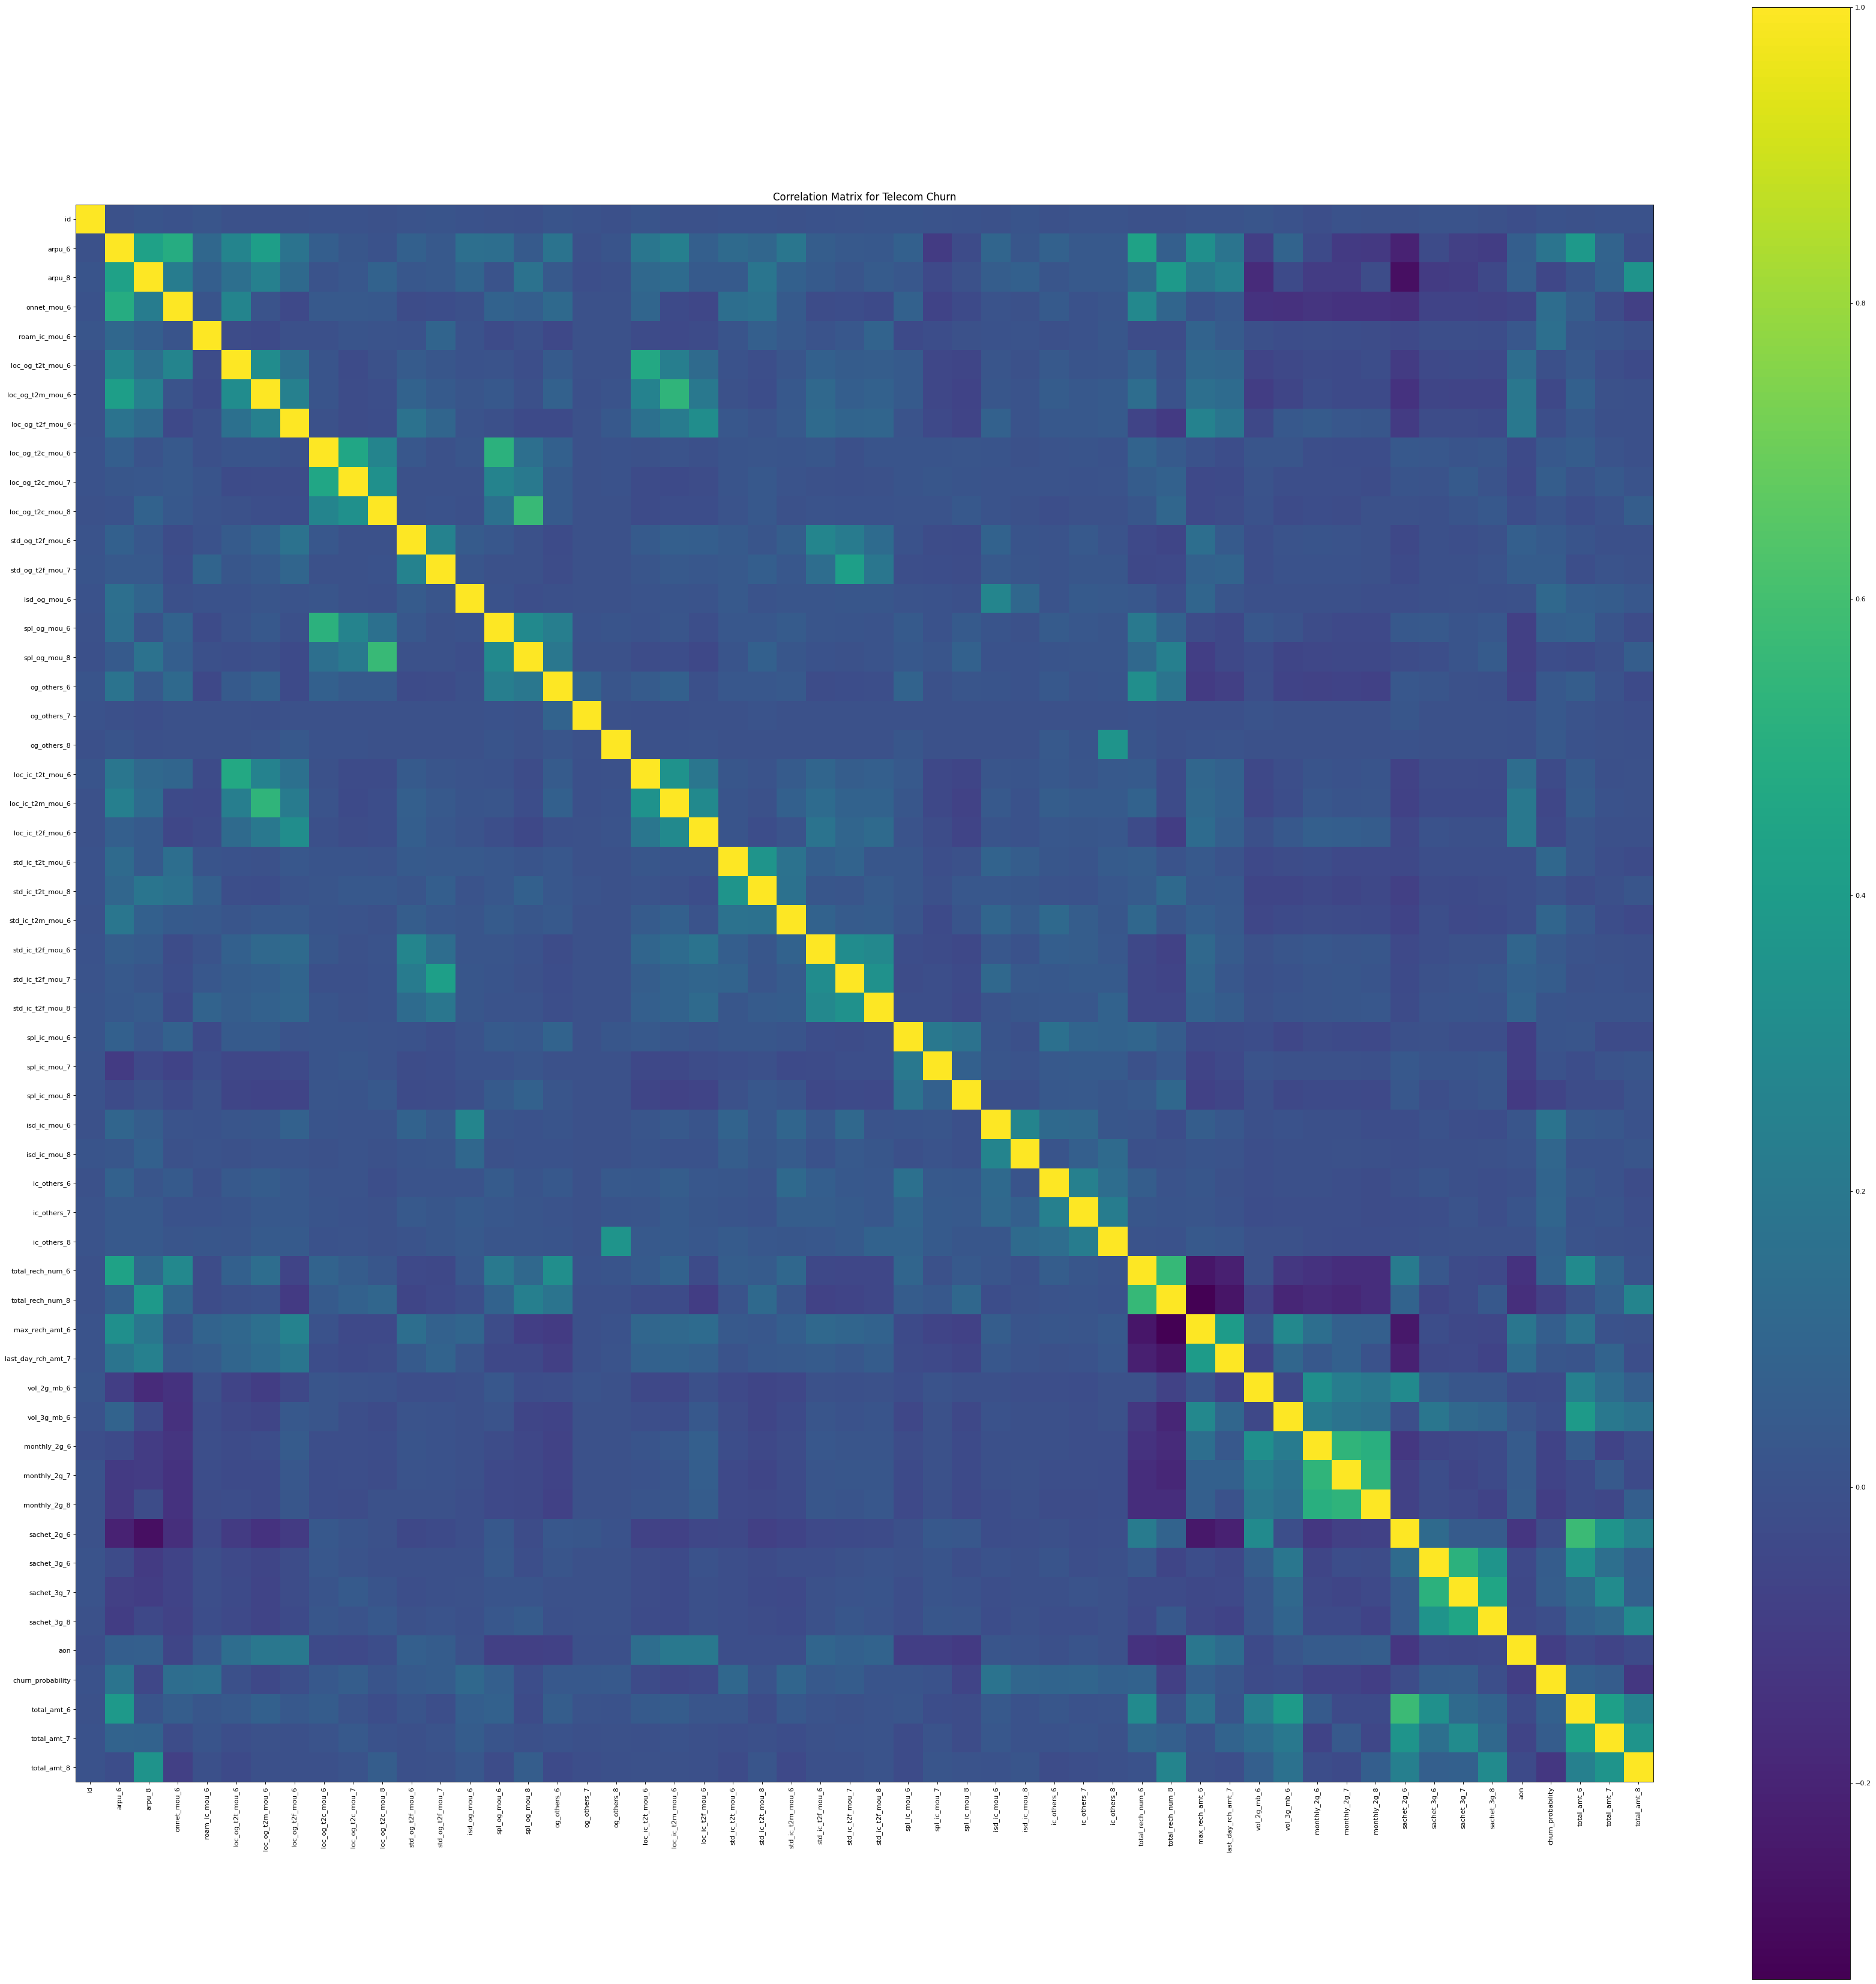

In [128]:
plotCorrelationMatrix(clean_data1, 53)

In [129]:
#Lets check numbers of customers by tenure
#divide days with 30 to get months
clean_data1['aon_month'] = clean_data1['aon']/30

#Dropping days
clean_data1.drop('aon',axis=1,inplace=True)

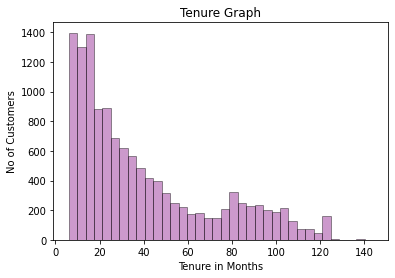

In [130]:
ax = sns.distplot(clean_data1['aon_month'], hist=True, kde=False, 
             bins=int(180/5), color = 'purple', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 10})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in Months')
ax.set_title('Tenure Graph')
plt.show()
# below graph simply shows the tenure of the customers

<AxesSubplot:>

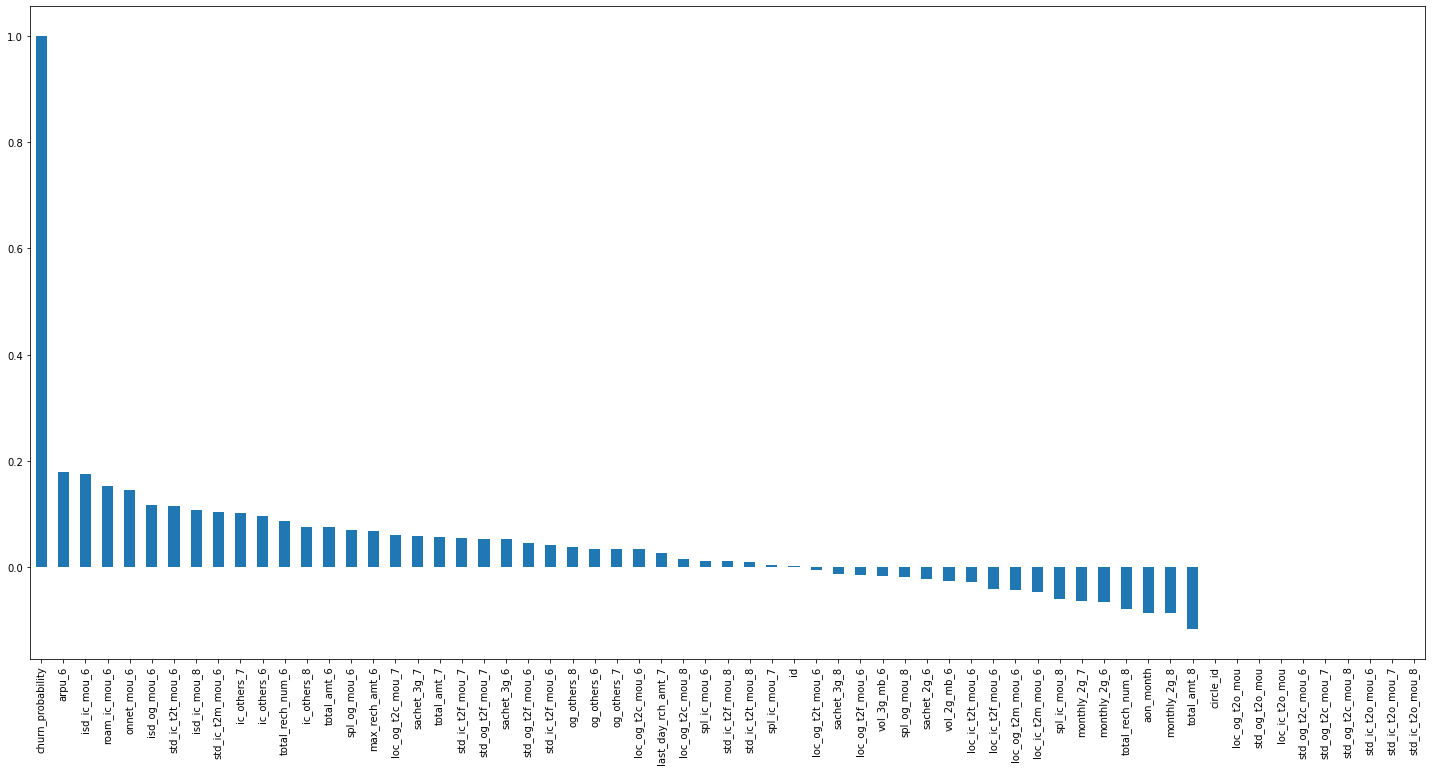

In [122]:
# lets check correlation of churn with other columns
plt.figure(figsize=(25,12))
clean_data1.corr()['churn_probability'].sort_values(ascending = False).plot(kind='bar')

Observations:

Average revenue in the 6 month and total amount in june are postively correlated with churn

Total amount in the 8th month and total number of months are negatively correlated

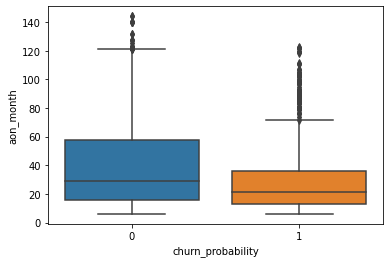

In [133]:
sns.boxplot(x = clean_data1.churn_probability, y = clean_data1.aon_month)
plt.show()



we can see that tenured customers do no churn and they keep availing telecom services

### Model Building to identify important features

In [134]:
#Drop Id and Circle ID as its not adding any value for the model

clean_data2 = clean_data1.drop(["id","circle_id"],axis=1)

In [136]:
#Prepare new dataset for model building
clean_data3 = clean_data2.copy()

In [137]:
#Preparing x&y for test and train
y= clean_data3.pop("churn_probability")
X= clean_data3

In [143]:
#Remove datetime before scaling
X.drop(['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8',
                                       'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'],axis = 1,inplace=True)
X.head()




,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_8,onnet_mou_6,roam_ic_mou_6,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,isd_og_mou_6,spl_og_mou_6,spl_og_mou_8,og_others_6,og_others_7,og_others_8,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_8,max_rech_amt_6,last_day_rch_amt_7,vol_2g_mb_6,vol_3g_mb_6,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_3g_6,sachet_3g_7,sachet_3g_8,total_amt_6,total_amt_7,total_amt_8,aon_month
0,0.0,0.0,0.0,339.089,113.611,10.59,0.00,8.21,62.41,0.33,3.18,6.33,0.00,0.0,0.0,0.0,0.0,0.0,0.0,37.58,2.64,1.59,0.0,0.0,4.08,79.28,3.18,2.85,0.00,13.59,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,22,9,44,30,654.09,0.0,0,0,0,7,0,0,0,790.0,1074.0,530.0,6.900000
1,0.0,0.0,0.0,142.623,214.704,4.10,0.64,3.06,13.59,0.00,0.13,2.00,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.26,6.01,0.00,0.0,0.0,9.79,33.83,0.00,0.00,1.56,36.78,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.06,0.0,7,5,110,128,0.00,0.0,0,0,0,0,0,0,0,269.0,1284.0,128.0,28.933333
2,0.0,0.0,0.0,0.000,1644.883,0.00,1.99,0.00,0.00,0.00,0.00,0.00,5.81,0.0,0.0,0.0,0.0,0.0,0.0,0.00,13.21,0.00,0.0,0.0,0.00,0.00,0.00,0.00,12.99,0.00,0.00,0.00,5.41,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.36,0.0,0.00,0.0,5,30,0,128,0.00,0.0,0,0,0,0,0,0,0,0.0,1428.0,1962.0,50.500000
3,0.0,0.0,0.0,963.469,449.696,215.46,0.00,0.43,14.69,4.09,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,2.21,3.44,1.85,0.0,0.0,5.64,53.18,15.51,7.56,1.96,39.88,21.68,3.21,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,13,9,128,70,0.00,0.0,0,0,0,0,0,0,0,1152.0,1229.0,528.0,21.733333
4,0.0,0.0,0.0,338.812,456.497,470.23,0.00,2.98,9.14,0.00,12.55,10.91,0.00,0.0,0.0,0.0,0.0,0.0,0.0,19.23,4.26,0.00,0.0,0.0,3.38,65.71,0.81,1.76,0.93,0.35,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,12,10,110,36,225.01,0.0,0,0,0,2,0,0,0,506.0,512.0,600.0,21.366667


In [146]:
#Scaling the X data
scaler1 = StandardScaler()
X = scaler1.fit_transform(X)
X

array([[ 0.        ,  0.        ,  0.        , ...,  0.0588245 ,
        -0.51509284, -1.05327842],
       [ 0.        ,  0.        ,  0.        , ...,  0.28041243,
        -0.95841663, -0.34253113],
       [ 0.        ,  0.        ,  0.        , ...,  0.43235843,
         1.06411031,  0.35316251],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.0588245 ,
        -0.77314699, -1.00596695],
       [ 0.        ,  0.        ,  0.        , ..., -0.56795276,
        -0.15999269, -0.97263387],
       [ 0.        ,  0.        ,  0.        , ...,  0.3416129 ,
        -0.51619563, -1.03822477]])

In [147]:
# split the dateset into train-test dataset


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (8959, 61)
Dimension of X_test: (3840, 61)


In [160]:
from sklearn.svm import SVC

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.92734375

SVM gave an accuracy of 92%

In [163]:
#Lets find out important feature using RFE & Logistic Regression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

rfe = RFE(logreg,n_features_to_select = 20)   
rfe = rfe.fit(X_train, y_train)

In [165]:
rfe_features = list(clean_data3.columns[rfe.support_])
print("15 most important features selected by RFE ", rfe_features)

15 most important features selected by RFE  ['arpu_6', 'roam_ic_mou_6', 'loc_og_t2m_mou_6', 'isd_og_mou_6', 'og_others_7', 'og_others_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_8', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_8', 'ic_others_6', 'total_rech_num_6', 'total_rech_num_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_3g_7', 'total_amt_7', 'total_amt_8', 'aon_month']


In [167]:
list(zip(clean_data3.columns,rfe.support_,rfe.ranking_))

[('loc_og_t2o_mou', False, 42),
 ('std_og_t2o_mou', False, 41),
 ('loc_ic_t2o_mou', False, 40),
 ('arpu_6', True, 1),
 ('arpu_8', False, 26),
 ('onnet_mou_6', False, 14),
 ('roam_ic_mou_6', True, 1),
 ('loc_og_t2t_mou_6', False, 33),
 ('loc_og_t2m_mou_6', True, 1),
 ('loc_og_t2f_mou_6', False, 20),
 ('loc_og_t2c_mou_6', False, 6),
 ('loc_og_t2c_mou_7', False, 9),
 ('loc_og_t2c_mou_8', False, 3),
 ('std_og_t2f_mou_6', False, 25),
 ('std_og_t2f_mou_7', False, 22),
 ('std_og_t2c_mou_6', False, 36),
 ('std_og_t2c_mou_7', False, 39),
 ('std_og_t2c_mou_8', False, 38),
 ('isd_og_mou_6', True, 1),
 ('spl_og_mou_6', False, 5),
 ('spl_og_mou_8', False, 4),
 ('og_others_6', False, 28),
 ('og_others_7', True, 1),
 ('og_others_8', True, 1),
 ('loc_ic_t2t_mou_6', False, 24),
 ('loc_ic_t2m_mou_6', False, 7),
 ('loc_ic_t2f_mou_6', False, 10),
 ('std_ic_t2t_mou_6', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_6', False, 13),
 ('std_ic_t2f_mou_6', False, 15),
 ('std_ic_t2f_mou_7', False, 

### Overall Conclusion

Customers with high tenure more than 4 years are tend to retain

Total reachrge amount and the total number of recharges are an important factor for churn and it negatively impacts

Average revenue and the roaming incoming charges are important indicators for churn

ISD Outgoing calls minutes of usage is important churn indicator

Local outgoing calls to another network minutes is an important indicator for churn
